Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = ""

---

# Vaja 3: Osnovna obdelava slik
## Navodila
Vaja je namenjena spoznavanju in razumevanju osnovnih postopkov za obdelavo slik kot so filtriranje,
glajenje in ostrenje ter interpolacija in decimacija slik.

### Konvolucija
Filtriranje slike lahko izvedemo s postopkom 2D diskretne konvolucije med podano sliko $g(x, y)$
in konvolucijskim jedrom $k(u, v)$ velikosti $U \times V$:

$$f(x, y) = \sum_{-U/2}^{U/2} \sum_{-V/2}^{V/2} k(u, v) g(x - u, y - u),$$

kjer je $f(x, y)$ izhodna slika. Na področju, kjer slika $g(x, y)$ ni definirana v skladu z definicijo konvolucije
predpostavimo sivinsko vrednost 0. V Pythonu je 2D diskretno konvolucijo mogoče izračunati s štirimi
vgnezdenimi for zankami. Zunanji dve zanki uporabimo za naslavljanje slikovnih elementov slike $g(x, y)$,
notranji dve zanki pa za naslavljanje konvolucijskega jedra $k(u, v)$. Konvolucijsko jedro $k(u, v)$ je definirano kot 2D matrika, središče jedra $k(0, 0) \leftrightarrow K$ pa v Pythonu ustreza indeksoma `floor(K.shape/2)`, kar
je potrebno upoštevati pri naslavljanju 2D matrike konvolucijskega jedra.

### Interpolacija
S postopkom interpolacije slik lahko priredimo sivinsko vrednost poljubni točki v slikovni ravnini. Na ta način lahko povečamo vzorčno frekvenco in s tem velikost slik ter tako navidezno zmanjšamo velikost slikovnih elementov. Glede na to, koliko sosednjih slikovnih elementov upoštevamo pri izračunu sivinske vrednosti v podani točki, delimo način interpolacije slik na:

1. ničti red ali interpolacija najbližjega soseda -- upoštevamo le najbližji slikovni element,
2. prvi red ali (bi)linearna interpolacija -- upoštevamo le štiri sosednje slikovne elemente,
3. višji red, npr. (bi)kubična interpolacija (drugi red), ki upošteva 16 sosednjih slikovnih elementov.

![Bilinearna interpolacija](data:image/png;base64,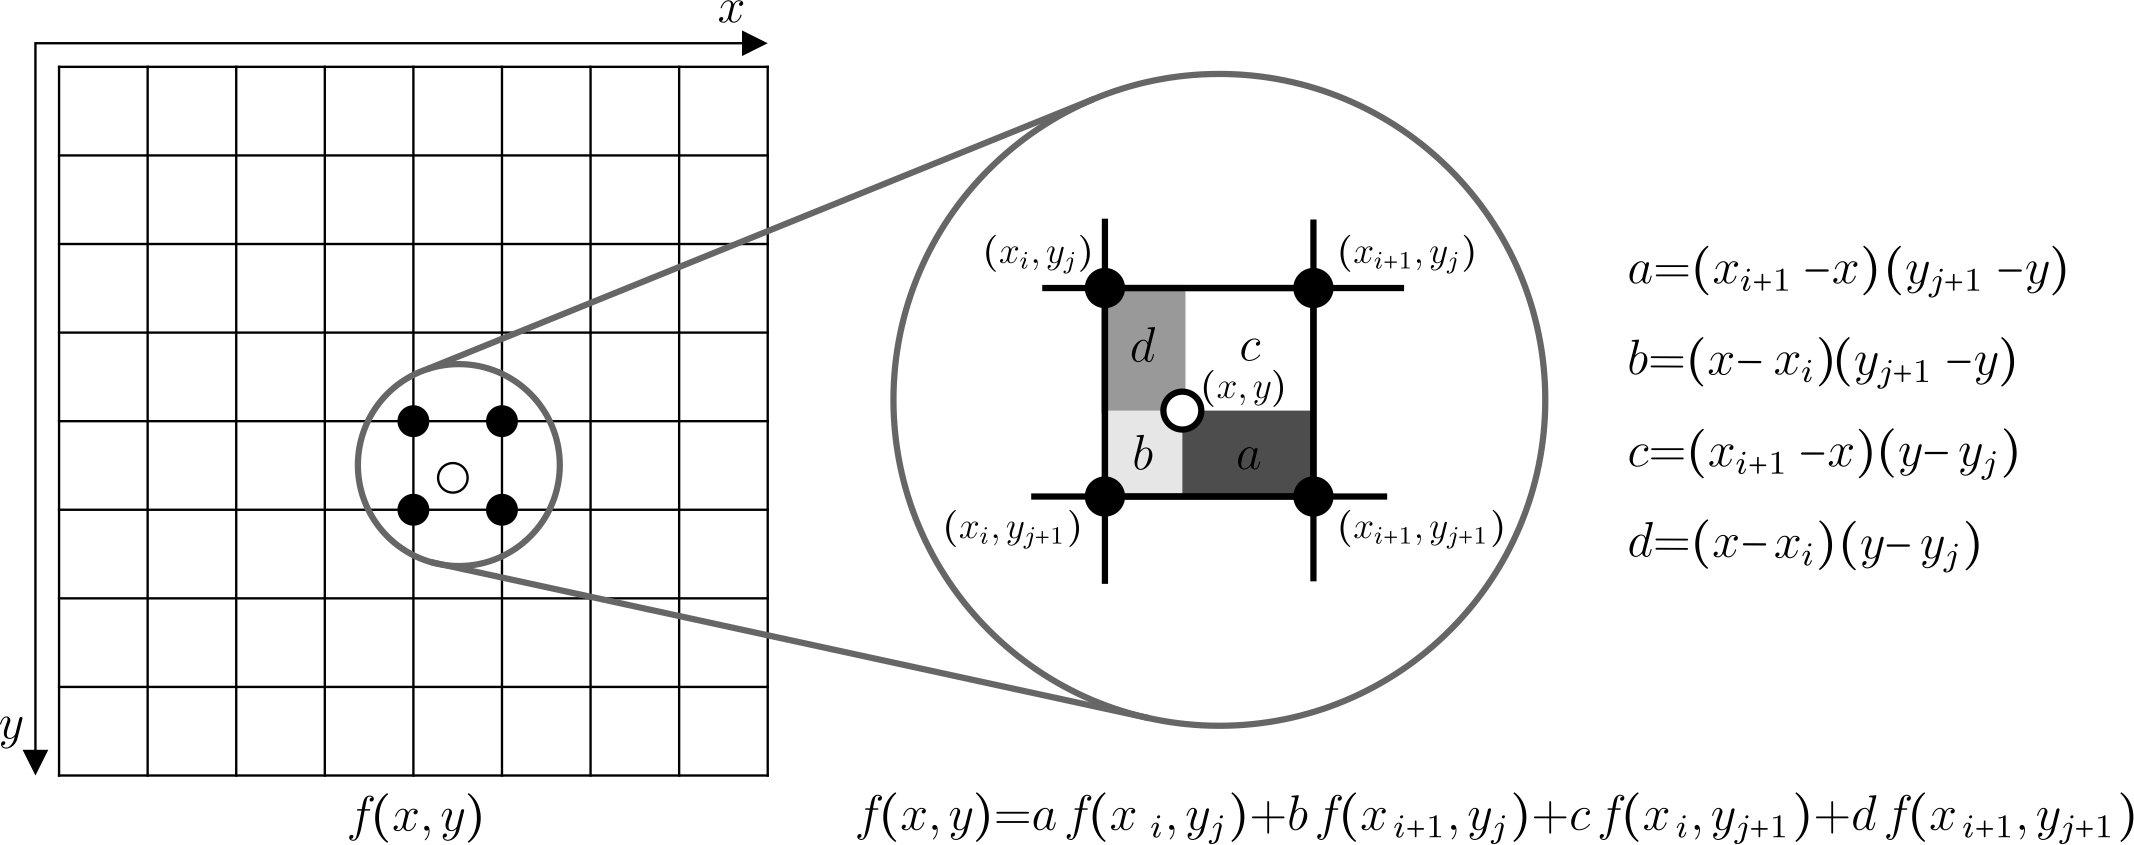)

| ![Bilinearna interpolacija](images/RV_4_BilinearnaInterpolacija.png) |
|:--:|
| **Bilinearna interpolacija** |

Računska zahtevnost interpolacijskih postopkov 2D slik v grobem raste s kvadratom reda interpolacije, kar pomeni, da je bikubična interpolacija (drugi red) približno štiri krat bolj zahtevna oziroma počasnejša od bilinearne interpolacije (prvi red). Naštete interpolacijske postopke je mogoče posplošiti, tako da delujejo tudi za večrazsežne slike.

S postopkom decimacije slik zmanjšamo vzorčno frekvenco ter s tem velikost slik. Skladno z Nyquistovim vzorčnim teoremom je pred postopkom decimacije potrebno sliko filtrirati z nizko prepustnim sitom in na ta način odstraniti visoko frekvenčno informacijo. Pri decimaciji se pogosto uporablja piramidna shema, kjer se vzorčna frekvenca izvirne slike zaporedoma zmanjšuje s celoštevilsko vrednostjo, običajno dva.

![Piramidna decimacija](images/RV_4_SLO_PiramidnaDecimacija.png)

Pri vaji boste napisali funkcije za filtriranje slik z 2D konvolucijo in preizkusili delovanje z različnimi jedri za namen glajenja in ostrenja sivinskih in barvnih slik. Funkcije za interpolacijo in decimacijo slik boste uporabili za povečavo oziroma pomanjšavo sivinskih in barvnih slik. 

| ![Gaussova funkcija](images/RV_4_GaussovoJedro.png) |
| :---: |
| **Gaussova funkcija pri različnih vrednostih parametra $\sigma$** |

| ![Ostrenje](images/RV_4_Ostrenje.png) |
| :---: |
| **Ostrenje slike z uporabo Laplaceovega jedra** |

| ![Interpolacija in decimacija](images/RV_4_SLO_RezultatiInterpolacijaDecim.png) |
| :---: |
| **Interpolacija in decimacija barvnih slik** |

## Naloge
1. Napišite funkcijo, ki izračuna 2D diskretno konvolucijo med vhodno sivinsko sliko `iImage` in konvolucijskim jedrom `iKernel`:
```python
    def discreteConvolution2D( iImage, iKernel ):
        return oImage
```
kjer je `oImage` izhodna sivinska slika. Preizkusite delovanje funkcije 2D diskretne konvolucije in preverite njen vpliv na vhodno sivinsko sliko, tako da uporabite konvolucijsko jedro 
`iKernel = numpy.ones([k,k])/k**2` 
za različne vrednosti $k = 2n + 1; n = 1, 2, 3, \ldots$

In [1]:
import numpy as np
import PIL.Image as Image
import rvlib as rv
import matplotlib.pyplot as plt

(3, 401, 600)
(401, 600)
(401, 600) (421, 620)


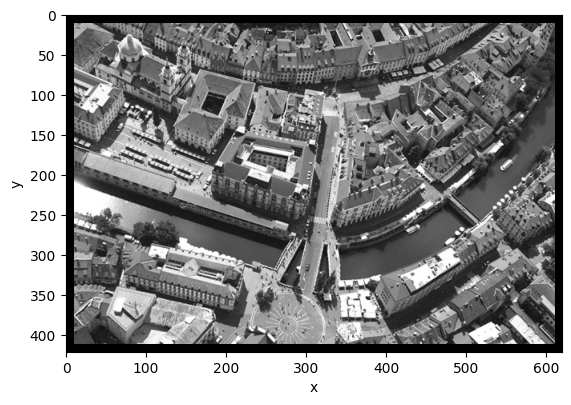

In [52]:
def zeroPad(image, m, n):
    # Your Code Here
    #padded_image = np.pad(image, ((n, n), (m, m)), mode='constant', constant_values=0)
    #padded_image = np.pad(image, n, mode='constant', constant_values=0)
    shape = image.shape + np.array([2*m, 2*n])
    padded_image = np.zeros(shape)
    padded_image[m:shape[0] - m, n:shape[1] - n] = image
    return padded_image

img = rv.loadImage('./data/slika.JPG')
img = rv.colorToGray(img)
img_pad = zeroPad(img, 10, 10)
rv.showImage(img_pad)

In [53]:
def discreteConvolution2D(iImage, iKerne):
    # Your Code Here
    n = np.array(iKerne.shape[0] // 2).astype('uint8')
    m = np.array(iKerne.shape[1] // 2).astype('uint8')
    Y, X = iImage.shape
    iImage = zeroPad(iImage, m, n)
    oImage = np.zeros(iImage.shape)
    for i in range(n, Y+n):
        for j in range(m, X+m):
            subImage = iImage[i-n:i+n+1, j-m:j+m+1]
            oImage[i, j] = np.sum(subImage * iKerne)
    oImage = oImage[n:Y+n, m:X+m]
    return oImage

# Test
image_rgb = Image.open('./data/slika.JPG') 
image_rgb = np.array(image_rgb)
image = rv.colorToGray(np.transpose(image_rgb,[2,0,1]))
kernel = lambda k: np.ones([k,k])/k**2 

# Jedro 1x1 -- ni sprememb
image_conv1 = discreteConvolution2D(image, kernel(1))

# Jedro 3x3
image_conv3 = discreteConvolution2D(image, kernel(3))

# Jedro 5x5
image_conv5 = discreteConvolution2D(image, kernel(5))

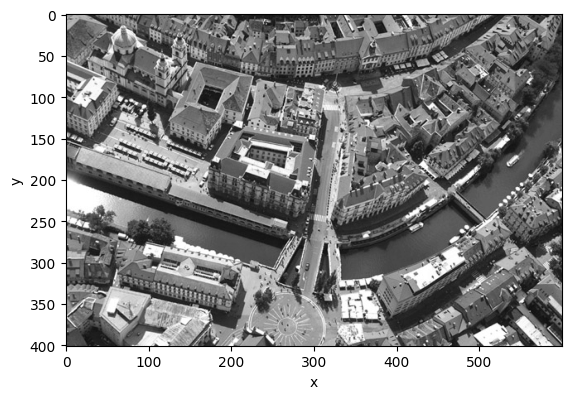

In [54]:
rv.showImage(image_conv1)

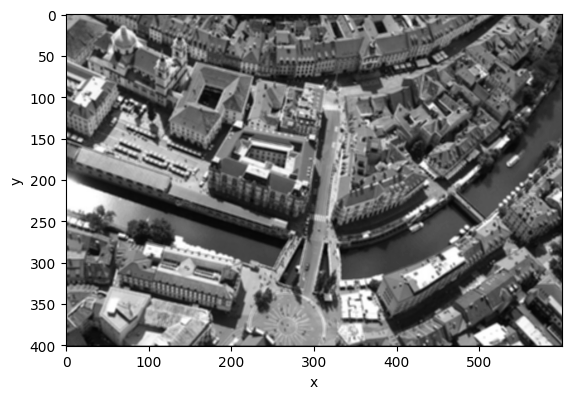

In [55]:
rv.showImage(image_conv3)

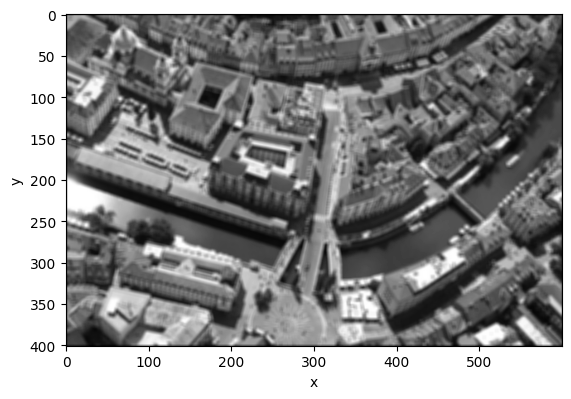

In [56]:
rv.showImage(image_conv5)

2. Napišite funkcijo za interpolacijo ničtega reda, ki vzorči vhodno 2D sivinsko sliko iImage:
```python
    def interpolate0Image2D( iImage, iCoorX, iCoorY ):
        return oImage
```
kjer so `iCoorX` in `iCoorY` vzorčne koordinate v prostoru vhodne slike `iImage`, v katerih želimo izračunati sivinsko vrednost. Izračunane sivinske vrednosti predstavljajo sivinske vrednosti izhodne slike `oImage`. Interpolacija ničtega reda priredi sivinsko vrednost v točki $(x, y)$ enako sivinski vrednosti najbližje točke na diskretni vzorčni mreži. Pri iskanju najbližje točke v diskretni mreži si pomagajte z Python funkcijo `numpy.floor()`, za definicijo vzorčnih točk pa uporabite funkcijo `numpy.meshgrid(..., indexing='xy')`. Preizkusite delovanje funkcije na podsliki sivinske slike med ogliščema $(260, 210)$ in $(360, 280)$ tako, da podsliko prevzorčite s trikrat bolj gosto vzorčno mrežo, kot je mreža originalne sivinske slike.

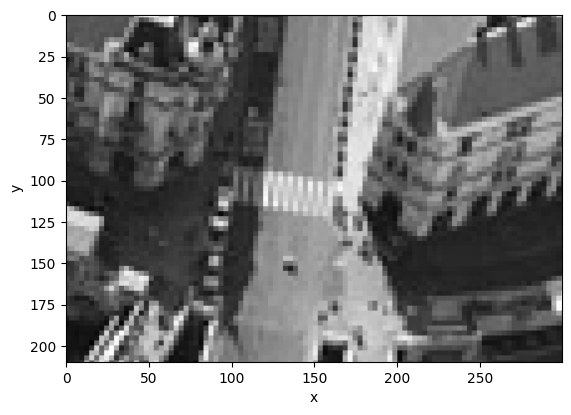

In [32]:
def interpolate0Image2D(iImage, iCoorX, iCoorY ):
    # Your Code Here
    X, Y = np.meshgrid(iCoorX, iCoorY, indexing='xy')
    X = np.round(X).astype('uint16')
    Y = np.round(Y).astype('uint16')
    oImage = iImage[Y, X]
    return oImage

image_interp0 = interpolate0Image2D(image, iCoorX = np.arange(260,360,1/3), iCoorY = np.arange(210,280,1/3))
rv.showImage(image_interp0)

3. Napišite funkcijo za interpolacijo prvega reda, ki prevzorči vhodno 2D sivinsko sliko iImage:
```python
    def interpolate1Image2D( iImage, iCoorX, iCoorY ):
        return oImage
```
kjer so `iCoorX` in `iCoorY` vzorčne koordinate v prostoru vhodne slike iImage, v katerih želimo izračunati sivinsko vrednost. Izračunane sivinske vrednosti predstavljajo sivinske vrednosti izhodne slike `oImage`. Interpolacija prvega reda priredi sivinsko vrednost v točki $(x, y)$ enako linearno uteženi vsoti sivinskih vrednosti sosednjih štirih točk na diskretni vzorčni mreži (glej opis bilinearne interpolacije). Pri iskanju izhodiščne leve gornje točke v diskretni mreži si pomagajte s funkcijo `numpy.floor()`. Preizkusite delovanje funkcije na podsliki sivinske slike med ogliščema $(260, 210)$ in $(360, 280)$ tako, da podsliko prevzorčite s trikrat bolj gosto vzorčno mrežo, kot je mreža originalne sivinske slike.

In [33]:
def interpolate1Image2D( iImage, iCoorX, iCoorY ):
    # Your Code Here
    X, Y = np.meshgrid(iCoorX, iCoorY, indexing='xy')
    Xi = np.floor(X).astype('uint16')
    Yi = np.floor(Y).astype('uint16')
    a = (Xi+1-X) * (Yi+1-Y)
    b = (X-Xi) * (Yi+1-Y)
    c = (Xi+1-X) * (Y-Yi)
    d = (X-Xi) * (Y-Yi)
    oImage = a * iImage[Yi, Xi] + b * iImage[Yi, Xi+1] + c * iImage[Yi+1, Xi] + d * iImage[Yi+1, Xi+1]
    return oImage

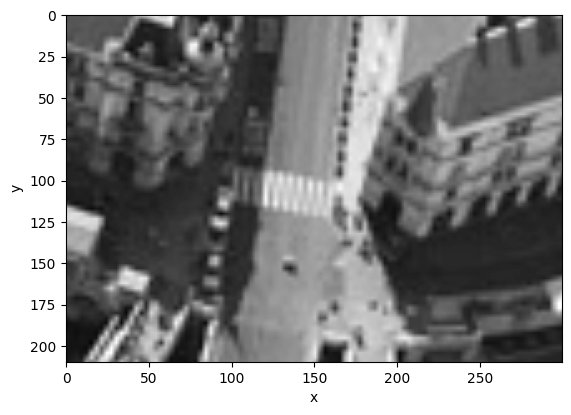

In [34]:
image_interpol = interpolate1Image2D( image, np.arange(260,360,1/3), np.arange(210,280,1/3))
rv.showImage(image_interpol)

4. Napišite funkcijo za piramidno decimacijo sivinskih slik:
```python
    def decimateImage2D( iImage, iLevel ):
        return oImage
```
kjer je `iImage` vhodna sivinska slika, `iLevel` pa število zaporednih decimacij vhodne slike s faktorjem dva. Pred vsako decimacijo filtrirajte sliko z nizkoprepustnim sitom velikosti $3 \times 3$ (glej opis piramidne decimacije) s funkcijo `discreteConvolution2D()`. Funkcija naj vrne decimirano sivinsko sliko `oImage`. Preizkusite delovanje funkcije na sivinski sliki za vrednosti `iLevel = 1, 2, 3`.

In [37]:
def decimateImage2D(iImage, iLevel, iKernel = np.array([[1/16,1/8, 1/16],[1/8, 1/4, 1/8],[1/16, 1/8, 1/16]])):
    # Your Code Here
    if iLevel <= 0:
        return iImage
    else:
        oImage = iImage
        dy, dx = oImage.shape
        X, Y = np.meshgrid(np.arange(0, dx, 2), np.arange(0, dy, 2), indexing='xy')
        oImage = discreteConvolution2D(oImage, iKernel)
        oImage = oImage[Y, X]
        return decimateImage2D(oImage, iLevel-1, iKernel)

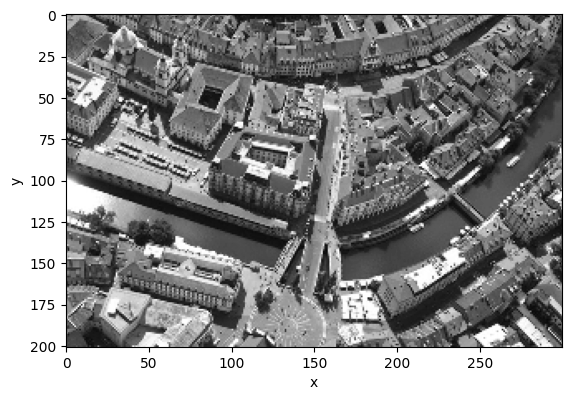

In [40]:
kernel = np.array([[1/16, 1/8, 1/16],
                   [1/8, 1/4, 1/8],
                   [1/16, 1/8, 1/16]])
image_decimate1 = decimateImage2D(image, 1, kernel)
rv.showImage(image_decimate1)

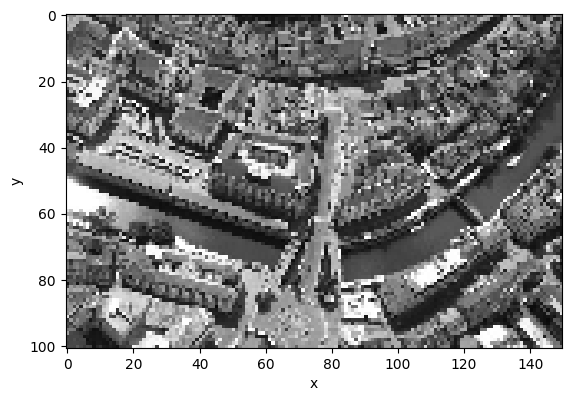

In [41]:
image_decimate2 = decimateImage2D(image, 2, kernel)
rv.showImage(image_decimate2)

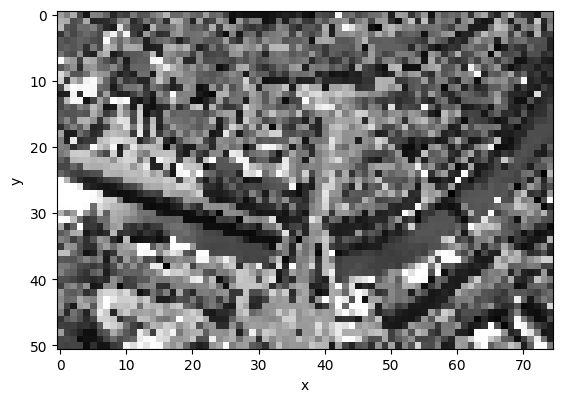

In [42]:
image_decimate3 = decimateImage2D(image, 3, kernel)
rv.showImage(image_decimate3)